In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\sadaksh\Desktop\MAIB\Term 1\Probability and statistics\Stats project\Life Expectency (WHO)\Life_Expectancy.csv")
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_to_19_years,Thinness_5_to_9_years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
old_cols = list(df.columns)
new_cols = []
for col in old_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [5]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
#adult mortality value of 1 is a measurement error. 
#infant_deaths as 0 per 1000 is an error. can be taken as null value. and 1800 per 1000 is an error
#for bmi feature, below 18.5 range (underweight), above 24.9 range (overweight), 75% of the data is overweight
#bmi less than 10 and more than 50 can be changed to null values as the data of mentioned range is not possible.
#for under-five_deaths, value of 0 for 25% of the data is an anomaly
#gdp if $1.68 is not possible


In [8]:
#Following are the features that needs to be changed:
#adult_mortality of less than 5 percentile can be replaced with null
#infant_deaths of 0
#bmi<10 and bmi>50 can be changed to null
#under_five_deaths of 0 can be changed to null


# DEALING WITH MISSING VALUES

In [9]:
df['infant_deaths'] = df['infant_deaths'].replace(0, np.nan)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [10]:
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)

In [11]:
adult_mort_under5 = np.percentile(df.adult_mortality.dropna(), 5)

In [12]:
df['adult_mortality'] = df.apply(lambda x: np.nan if x.adult_mortality < adult_mort_under5 else x.adult_mortality, axis=1)

In [13]:
#let's deal with the missing values 
df.isnull().sum()

country                               0
year                                  0
status                                0
life_expectancy                      10
adult_mortality                     155
infant_deaths                       848
alcohol                             194
percentage_expenditure                0
hepatitis_b                         553
measles                               0
bmi                                1456
under-five_deaths                   785
polio                                19
total_expenditure                   226
diphtheria                           19
hiv/aids                              0
gdp                                 448
population                          652
thinness_1_to_19_years               34
thinness_5_to_9_years                34
income_composition_of_resources     167
schooling                           163
dtype: int64

In [14]:
#two object variables, and we have found missing values, calculating in terms of percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
country,country,0.000000
year,year,0.000000
status,status,0.000000
life_expectancy,life_expectancy,0.340368
adult_mortality,adult_mortality,5.275698
infant_deaths,infant_deaths,28.863172
alcohol,alcohol,6.603131
percentage_expenditure,percentage_expenditure,0.000000
hepatitis_b,hepatitis_b,18.822328
measles,measles,0.000000


In [15]:
#we can drop bmi feature as it contains 50% null values
#infant_deaths,hepatitis_b,under-five_deaths,gdp,population accounts for most missing values

In [16]:
df.drop(columns='bmi', inplace=True)

In [17]:
df1 = df.copy()

In [18]:
df1.iloc[:, 3:].head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
X = df1.iloc[:, 3:]
print(X.shape)
X.head()

(2938, 18)


,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
#applying Linear Regression imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (2938, 18)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.05
[IterativeImputer] Change: 58654492.104683146, scaled tolerance: 1293859.294 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.06
[IterativeImputer] Change: 5798928.194066626, scaled tolerance: 1293859.294 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.09
[IterativeImputer] Change: 1538161.368978725, scaled tolerance: 1293859.294 
[IterativeImputer] Ending imputation round 4/20, elapsed time 0.12
[IterativeImputer] Change: 518147.668598581, scaled tolerance: 1293859.294 
[IterativeImputer] Early stopping criterion reached.


# OUTLIER ANALYSIS

In [21]:
column_names = list(df1.iloc[:, 3:].columns.values)
print(column_names)

['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_to_19_years', 'thinness_5_to_9_years', 'income_composition_of_resources', 'schooling']


In [22]:
X1 = pd.DataFrame(X, columns=column_names)
X1.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


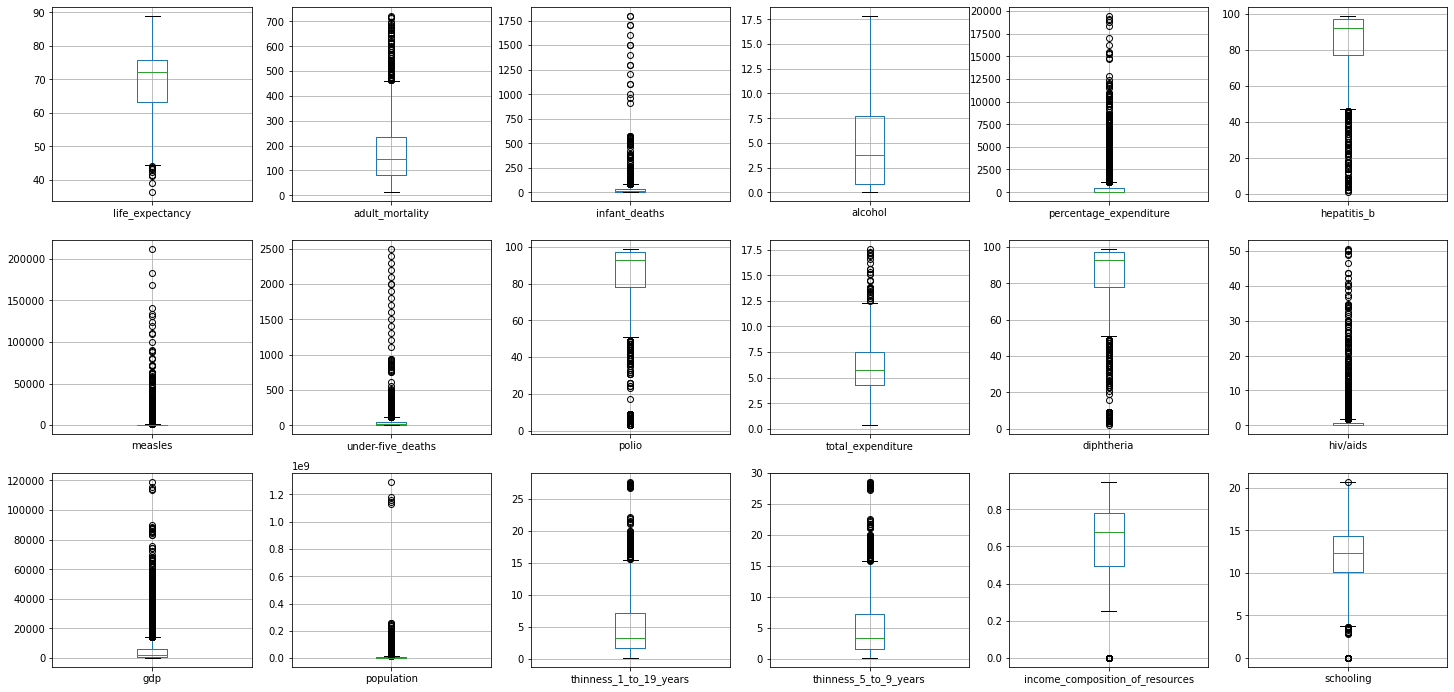

In [23]:
plt.figure(figsize=(25,25))
for i, col in enumerate(column_names, start=1):
    plt.subplot(6,6, i)
    df.boxplot(col)

In [24]:
def outlier_value_count(column_names, data=X1):
    q75, q25 = np.percentile(data[column_names], [75, 25])
    iqr = q75 - q25
    llimit = q25 - (iqr*1.5)
    ulimit = q75 + (iqr*1.5)
    outlier_value_count = len(np.where((data[column_names] > ulimit) | (data[column_names] < llimit))[0])
    print('Number of outliers: {}'.format(outlier_value_count))

In [25]:
Xcolumns = list(X1.columns)

In [26]:
for col in Xcolumns:
    outlier_value_count(col)

Number of outliers: 12
Number of outliers: 93
Number of outliers: 137
Number of outliers: 2
Number of outliers: 389
Number of outliers: 270
Number of outliers: 542
Number of outliers: 153
Number of outliers: 252
Number of outliers: 45
Number of outliers: 299
Number of outliers: 542
Number of outliers: 430
Number of outliers: 228
Number of outliers: 89
Number of outliers: 99
Number of outliers: 131
Number of outliers: 40


In [27]:
#we have significant amount of outliers in the dataset. 

In [28]:
X1.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
from scipy.stats.mstats import winsorize

In [30]:
def X1_winsorized_data(column_names, lower_limit, upper_limit):
    wins_data = winsorize(X1[column_names], limits=(lower_limit, upper_limit))
    wins_dict[column_names] = wins_data

In [31]:
wins_dict = {}
X1_winsorized_data(column_names[0], lower_limit=.0041, upper_limit=0)
X1_winsorized_data(column_names[1], lower_limit=0, upper_limit=.03)
X1_winsorized_data(column_names[2], lower_limit=0, upper_limit=.04)
X1_winsorized_data(column_names[3], lower_limit=0, upper_limit=.0001)
X1_winsorized_data(column_names[4], lower_limit=0, upper_limit=.130)
X1_winsorized_data(column_names[5], lower_limit=.1, upper_limit=0)
X1_winsorized_data(column_names[6], lower_limit=0, upper_limit=.18)
X1_winsorized_data(column_names[7], lower_limit=0, upper_limit=.05)
X1_winsorized_data(column_names[8], lower_limit=.09, upper_limit=0)
X1_winsorized_data(column_names[9], lower_limit=0, upper_limit=.01)
X1_winsorized_data(column_names[10], lower_limit=.1, upper_limit=0)
X1_winsorized_data(column_names[11], lower_limit=0, upper_limit=.182)
X1_winsorized_data(column_names[12], lower_limit=0, upper_limit=.14)
X1_winsorized_data(column_names[13], lower_limit=0, upper_limit=.07)
X1_winsorized_data(column_names[14], lower_limit=0, upper_limit=.03)
X1_winsorized_data(column_names[15], lower_limit=0, upper_limit=.03)
X1_winsorized_data(column_names[16], lower_limit=.05, upper_limit=0.045)
X1_winsorized_data(column_names[17], lower_limit=.025, upper_limit=0.014)

In [32]:
wins_df = df.iloc[:, 0:3]
for col in column_names:
    wins_df[col] = wins_dict[col]

In [33]:
wins_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,982.0,...,47.0,8.16,65.0,0.1,584.259210,31731688.0,15.6,16.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.6,16.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.6,16.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,982.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.6,16.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,982.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.6,16.1,0.454,9.5


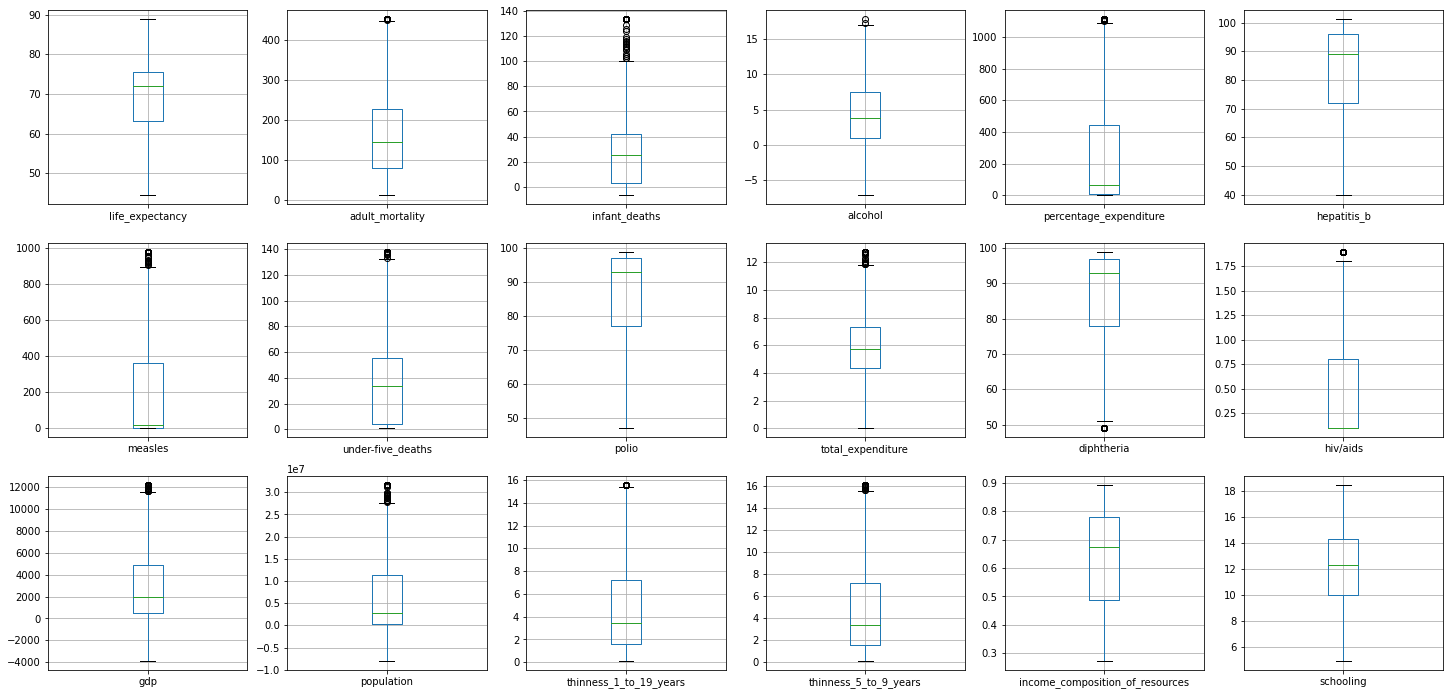

In [34]:
plt.figure(figsize=(25,25))
for i, col in enumerate(column_names, start=1):
    plt.subplot(6,6, i)
    wins_df.boxplot(col)

In [35]:
#most of the outliers are dealt with 

# DATA VISUALIZATION

In [36]:
wins_df.shape

(2938, 21)

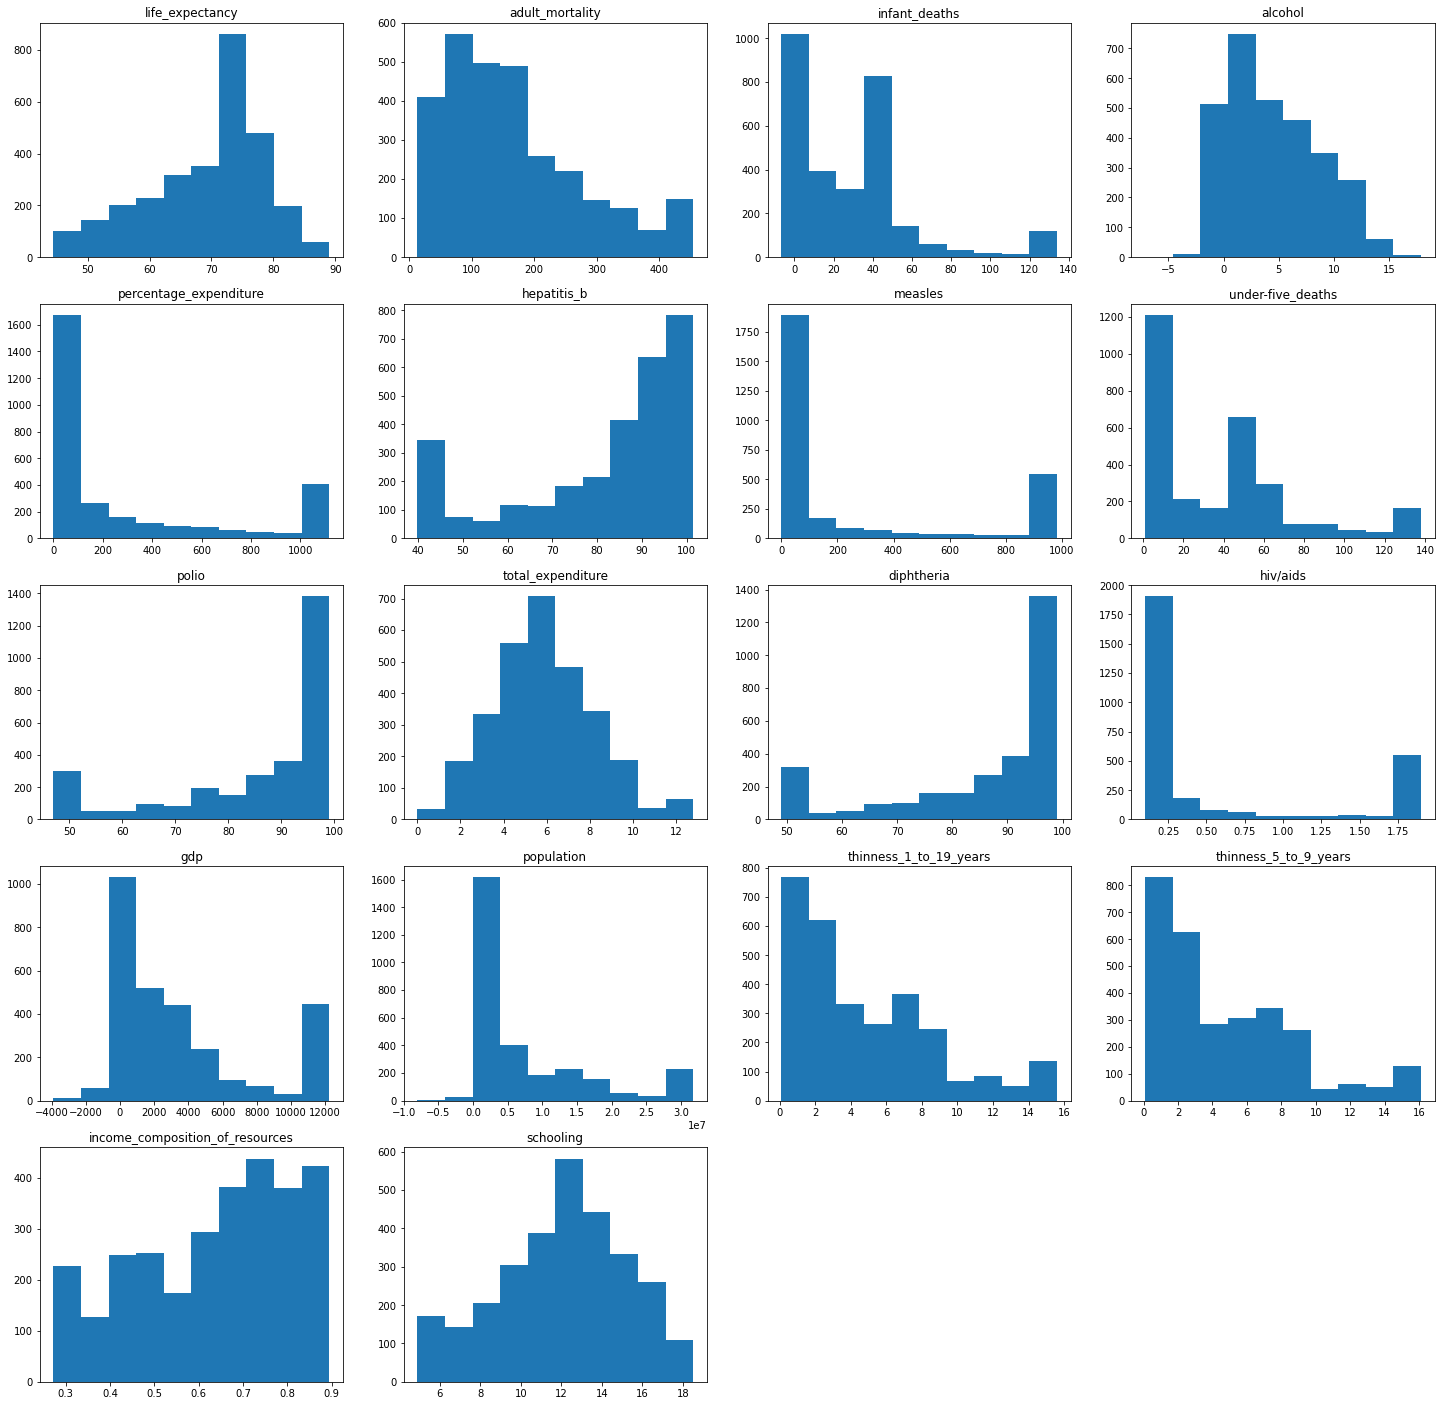

In [37]:
plt.figure(figsize=(25,25))
for i, col in enumerate(column_names, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

In [38]:
wins_df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
year,1.000000,0.168800,-0.077889,-0.022561,-0.045752,0.032386,0.209131,-0.123335,-0.041457,0.118724,0.066174,0.151927,-0.090044,0.142896,0.043096,-0.049692,-0.050214,0.205978,0.197275
life_expectancy,0.168800,1.000000,-0.708371,-0.237722,0.418500,0.486659,0.430649,-0.334696,-0.306413,0.570839,0.217599,0.581162,-0.794693,0.553818,-0.021886,-0.516745,-0.512084,0.834579,0.794289
adult_mortality,-0.077889,-0.708371,1.000000,0.127678,-0.218413,-0.319512,-0.271790,0.213724,0.178727,-0.361893,-0.130636,-0.369814,0.616501,-0.371234,0.022652,0.352396,0.357279,-0.573017,-0.518736
infant_deaths,-0.022561,-0.237722,0.127678,1.000000,-0.133028,-0.137413,-0.232298,0.399613,0.970991,-0.238922,-0.119937,-0.245247,0.139858,-0.145037,0.342808,0.253598,0.256075,-0.246094,-0.278939
alcohol,-0.045752,0.418500,-0.218413,-0.133028,1.000000,0.386848,0.156888,-0.195322,-0.116966,0.278096,0.312583,0.286202,-0.211909,0.420930,-0.013589,-0.458844,-0.448654,0.538083,0.593035
percentage_expenditure,0.032386,0.486659,-0.319512,-0.137413,0.386848,1.000000,0.146352,-0.193477,-0.139796,0.264187,0.188818,0.265076,-0.292975,0.834797,-0.058856,-0.333937,-0.335218,0.535888,0.512377
hepatitis_b,0.209131,0.430649,-0.271790,-0.232298,0.156888,0.146352,1.000000,-0.305013,-0.258000,0.713452,0.136311,0.773408,-0.379584,0.232829,-0.079671,-0.203726,-0.206960,0.411076,0.419461
measles,-0.123335,-0.334696,0.213724,0.399613,-0.195322,-0.193477,-0.305013,1.000000,0.389766,-0.310617,-0.163742,-0.306466,0.222489,-0.214094,0.270363,0.359223,0.364435,-0.295996,-0.352337
under-five_deaths,-0.041457,-0.306413,0.178727,0.970991,-0.116966,-0.139796,-0.258000,0.389766,1.000000,-0.278926,-0.092805,-0.286824,0.206591,-0.153050,0.310751,0.254027,0.256833,-0.307297,-0.327148
polio,0.118724,0.570839,-0.361893,-0.238922,0.278096,0.264187,0.713452,-0.310617,-0.278926,1.000000,0.170786,0.842467,-0.473086,0.344718,-0.036998,-0.286932,-0.285178,0.543593,0.544528


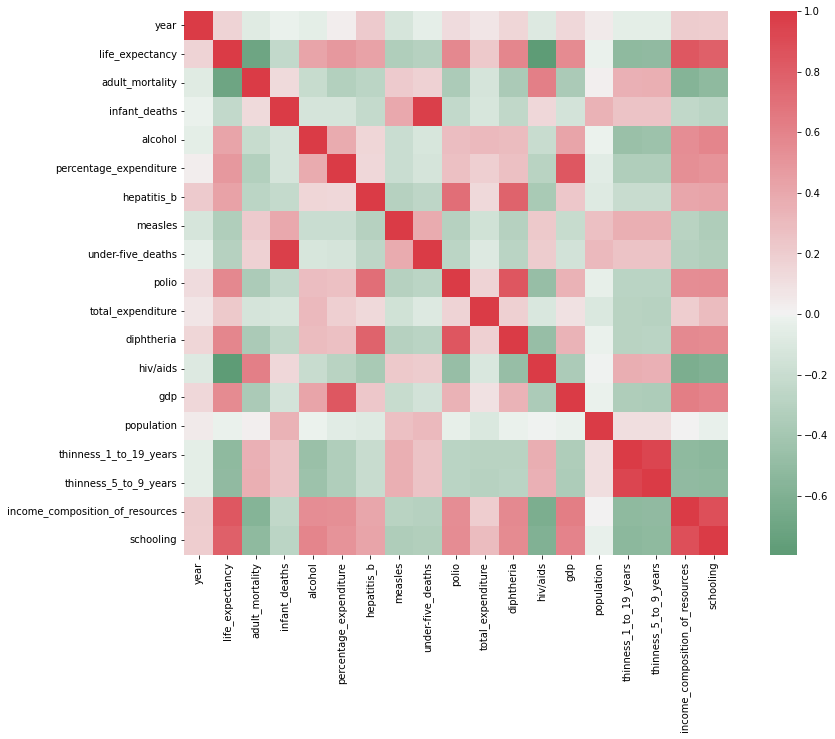

In [39]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(wins_df.corr(), cmap =cmap, center=0, annot=False, square=True);

In [40]:
#life_expectancy is highly correlated with 
#(negatively: schooling, income_composition_of_resources, gdp, diphtheria, polio, alcohol, percentage_expenditure, hepatitus_b)
#(positively: thinness_1_to_19_years, thinness_5_to_9_years, hiv/aids, under-five_deaths, measles, infant_deaths, adult_mortality)
#no correlation with population
#multicollinearity among features

COUNTRY WITH LIFE_EXPECTANCY

In [41]:
# Countries with Highest Life Expectancy
country_vs_life = df.groupby('country', as_index=False)['life_expectancy'].mean()
country_vs_life.sort_values(by = 'life_expectancy', ascending=False).head(10)

,country,life_expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [42]:
country_vs_life.sort_values(by = 'life_expectancy', ascending=True).head(10)

,country,life_expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


In [43]:
#relation between life_expectancy and country shows that 
#Sierra Leone with lowest life_expectancy and 
#Japan with the highest life expectancy

COUNTRY WITH STATUS

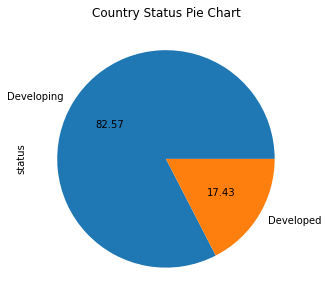

In [44]:
plt.figure(figsize=(10, 5))
wins_df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Country Status Pie Chart')

plt.show()

In [45]:
#82.57% of the data is in the developing status while only 17.43% of data is for Developed state.

LIFE_EXPECTANCY WITH REST OF THE FEATURES

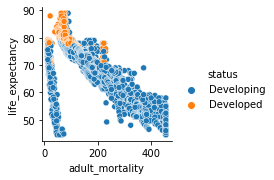

In [46]:
sns.pairplot(wins_df, x_vars=["adult_mortality"], y_vars=["life_expectancy"], hue="status")

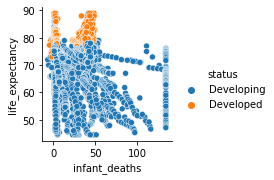

In [47]:
sns.pairplot(wins_df, x_vars=["infant_deaths"], y_vars=["life_expectancy"], hue="status")

In [48]:
#negative correlation: increasing infants deaths results in decrease in life_expectancy
#reasons due to lack of proper healthcare competency and population to prone to diseases which results in infants_deaths 

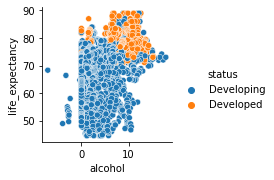

In [49]:
sns.pairplot(wins_df, x_vars=["alcohol"], y_vars=["life_expectancy"], hue="status")

In [50]:
#Alcohol plays an enormous role in our economy. 
#In the U.S. alone, the alcohol beverage industry is responsible
#for sustaining more than 4 million jobs and generating almost $70 billion in annual tax revenue.
#From the alcohol correlation with life_expectancy,
#Exporting branded products from developed countries to developing nations thus increases the annual tax revenue
#of developing countries, thus positive correlation in developing status and negative correlation in developed status


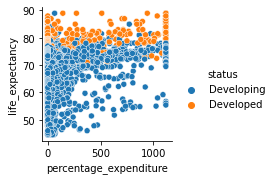

In [51]:
sns.pairplot(wins_df, x_vars=["percentage_expenditure"], y_vars=["life_expectancy"], hue="status")

In [52]:
#Increasing health expenditure is vital for providing gains in life expectancy.
#we can see the positive correlation for developing status but and very less negative correlation for developed nation
#as those nations can get the service via medical insurance or for some nations, free heathcare is provided.

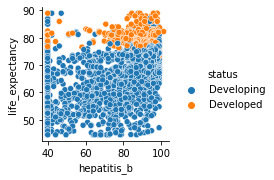

In [53]:
sns.pairplot(wins_df, x_vars=["hepatitis_b"], y_vars=["life_expectancy"], hue="status")

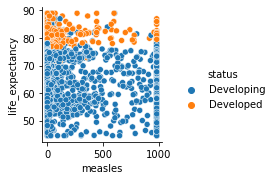

In [54]:
sns.pairplot(wins_df, x_vars=["measles"], y_vars=["life_expectancy"], hue="status")

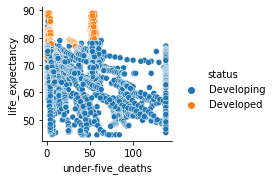

In [55]:
sns.pairplot(wins_df, x_vars=["under-five_deaths"], y_vars=["life_expectancy"], hue="status")

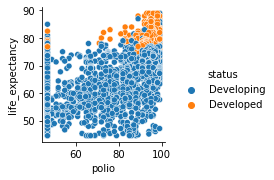

In [56]:
sns.pairplot(wins_df, x_vars=["polio"], y_vars=["life_expectancy"], hue="status")

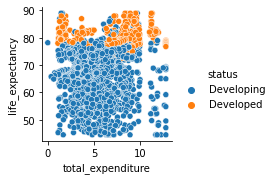

In [57]:
sns.pairplot(wins_df, x_vars=["total_expenditure"], y_vars=["life_expectancy"], hue="status")

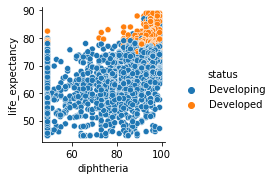

In [58]:
sns.pairplot(wins_df, x_vars=["diphtheria"], y_vars=["life_expectancy"], hue="status")

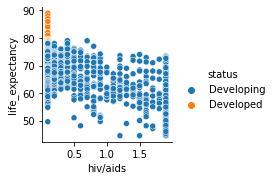

In [59]:
sns.pairplot(wins_df, x_vars=["hiv/aids"], y_vars=["life_expectancy"], hue="status")

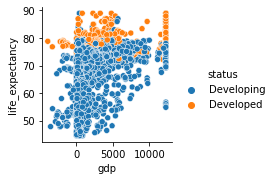

In [60]:
sns.pairplot(wins_df, x_vars=["gdp"], y_vars=["life_expectancy"], hue="status")

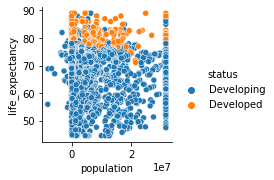

In [61]:
sns.pairplot(wins_df, x_vars=["population"], y_vars=["life_expectancy"], hue="status")

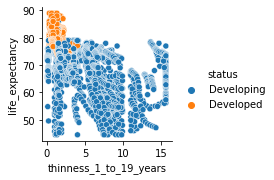

In [62]:
sns.pairplot(wins_df, x_vars=["thinness_1_to_19_years"], y_vars=["life_expectancy"], hue="status")

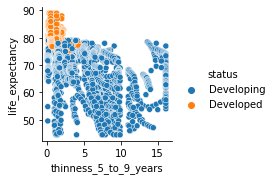

In [63]:
sns.pairplot(wins_df, x_vars=["thinness_5_to_9_years"], y_vars=["life_expectancy"], hue="status")

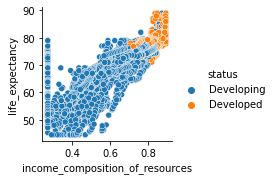

In [64]:
sns.pairplot(wins_df, x_vars=["income_composition_of_resources"], y_vars=["life_expectancy"], hue="status")

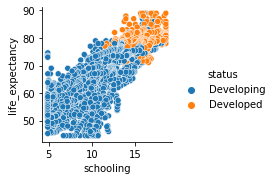

In [65]:
sns.pairplot(wins_df, x_vars=["schooling"], y_vars=["life_expectancy"], hue="status")

# DATA MODELLING

In [66]:
wins_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,982.0,...,47.0,8.16,65.0,0.1,584.259210,31731688.0,15.6,16.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.6,16.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.6,16.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,982.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.6,16.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,982.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.6,16.1,0.454,9.5


In [67]:
df2=wins_df.drop('country',axis=1)
df2.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,982.0,83.0,47.0,8.16,65.0,0.1,584.259210,31731688.0,15.6,16.1,0.479,10.1
1,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,15.6,16.1,0.476,10.0
2,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.6,16.1,0.470,9.9
3,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,982.0,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.6,16.1,0.463,9.8
4,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,982.0,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.6,16.1,0.454,9.5


In [68]:
objList = df2.select_dtypes(include = "object").columns 
print (objList)

Index(['status'], dtype='object')


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df2[feat] = le.fit_transform(df2[feat].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   status                           2938 non-null   int32  
 2   life_expectancy                  2938 non-null   float64
 3   adult_mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   float64
 5   alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   measles                          2938 non-null   float64
 9   under-five_deaths                2938 non-null   float64
 10  polio                            2938 non-null   float64
 11  total_expenditure                2938 non-null   float64
 12  diphtheria          

In [70]:
df2.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,2015,1,65.0,263.0,62.0,0.01,71.279624,65.0,982.0,83.0,47.0,8.16,65.0,0.1,584.259210,31731688.0,15.6,16.1,0.479,10.1
1,2014,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,15.6,16.1,0.476,10.0
2,2013,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.6,16.1,0.470,9.9
3,2012,1,59.5,272.0,69.0,0.01,78.184215,67.0,982.0,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.6,16.1,0.463,9.8
4,2011,1,59.2,275.0,71.0,0.01,7.097109,68.0,982.0,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.6,16.1,0.454,9.5


In [71]:
#using VIF for finding out the multicollinearity between features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df2[list(df2.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_info['Column'] = X_vif.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,421.450028,year
2,403.326167,life_expectancy
12,137.470324,diphtheria
10,103.743612,polio
18,87.658893,income_composition_of_resources
19,86.490872,schooling
7,50.480201,hepatitis_b
9,46.237016,under-five_deaths
4,41.742808,infant_deaths
16,22.493884,thinness_1_to_19_years


In [72]:
#creating a label from the data to reduce label dependency on other features
x_columns = df2.columns
y = df2["life_expectancy"]
print(x_columns)

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1_to_19_years',
       'thinness_5_to_9_years', 'income_composition_of_resources',
       'schooling'],
      dtype='object')


In [73]:
def get_stats():
    x = df2[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.672e+28
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:52:18   Log-Likelihood:                          72188.
No. Observations:                2938   AIC:                                 -1.443e+05
Df Residuals:                    2918   BIC:                                 -1.442e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [74]:
#dropping year column as VIF is very high
x_columns= x_columns.drop("year")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.425e+23
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:52:18   Log-Likelihood:                          54276.
No. Observations:                2938   AIC:                                 -1.085e+05
Df Residuals:                    2919   BIC:                                 -1.084e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [75]:
x_columns= x_columns.drop("life_expectancy")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.938e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:52:18   Log-Likelihood:                         -9607.0
No. Observations:                2938   AIC:                                  1.925e+04
Df Residuals:                    2920   BIC:                                  1.936e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [76]:
x_columns= x_columns.drop("thinness_5_to_9_years")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          2.052e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:52:18   Log-Likelihood:                         -9607.6
No. Observations:                2938   AIC:                                  1.925e+04
Df Residuals:                    2921   BIC:                                  1.935e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [77]:
x_columns= x_columns.drop("adult_mortality")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          2.179e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:52:18   Log-Likelihood:                         -9609.1
No. Observations:                2938   AIC:                                  1.925e+04
Df Residuals:                    2922   BIC:                                  1.935e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [78]:
df2.head()

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,2015,1,65.0,263.0,62.0,0.01,71.279624,65.0,982.0,83.0,47.0,8.16,65.0,0.1,584.259210,31731688.0,15.6,16.1,0.479,10.1
1,2014,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,15.6,16.1,0.476,10.0
2,2013,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.6,16.1,0.470,9.9
3,2012,1,59.5,272.0,69.0,0.01,78.184215,67.0,982.0,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.6,16.1,0.463,9.8
4,2011,1,59.2,275.0,71.0,0.01,7.097109,68.0,982.0,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.6,16.1,0.454,9.5


In [79]:
print(x_columns)

Index(['status', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'under-five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness_1_to_19_years', 'income_composition_of_resources',
       'schooling'],
      dtype='object')


In [80]:
remove = ['year','life_expectancy','adult_mortality','thinness_5_to_9_years']
features = df2[df2.columns.difference(remove)]

In [81]:
label = df2['life_expectancy']

In [82]:
print(features.shape)
print(label.shape)

(2938, 16)
(2938,)


In [83]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state = 0)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


steps = [('scalar',StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', LinearRegression())]

pipe = Pipeline(steps)

pipe.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [85]:
print('Training score: {}'.format(pipe.score(X_train, y_train)))

print('Test score: {}'.format(pipe.score(X_test, y_test)))

Training score: 0.905066212301755
Test score: 0.8877442391126342


In [86]:
steps1 = [('scalar',StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge(alpha=1,fit_intercept=True))]

ridge_pipe = Pipeline (steps1)

In [87]:
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=1))])

In [88]:
print('Training score: {}'.format(ridge_pipe.score(X_train, y_train)))

print('Test score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training score: 0.9044487557300127
Test score: 0.8889934664899418
